# Case Study: Linear Regression of Height & Weight

## Authors:
### Jerome Geronimo
### Cole Dorman

### Item 2  
#### Import all the modules required
#### - numpy
#### - pandas
#### - matplotlib
#### - seaborn
#### - LinearRegression

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Item 3
#### Read the height_mass.csv file into a Pandas DataSet called: people
#### Use the pandas read_csv method.

In [7]:
people = pd.read_csv('data/height_mass.csv')
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


### Item 4
#### Use a Seaborn histplot to show the distribution for Mass.
#### Experiment with different bin #’s and find which one gives you the clearest information about the data.


<Axes: xlabel='Mass (kg)', ylabel='Count'>

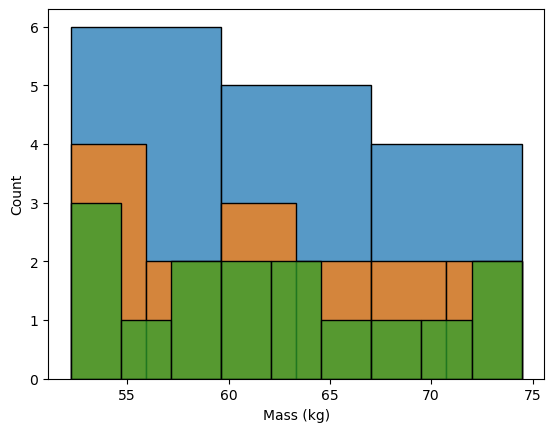

In [8]:
sns.histplot(people, x='Mass (kg)', bins=3)
sns.histplot(people, x='Mass (kg)', bins=6)
sns.histplot(people, x='Mass (kg)', bins=9)

#### What does the plot tell you about the data?

Segregating the samples into 6 bins provides clear information that the weight of the people in the sample dataset is skewed to the right. This means that there are more people in the sample that have less mass/weight versus those who have more mass/weight.

of the spectrum compared to the lighter side. Also, based on the plot, more than 50% of the sample has a weight < 65kg.

### Item 5
#### Use a Seaborn histplot to show the distribution for Height.
#### Experiment with different bin #’s and find which one gives you the clearest information about the data.

<Axes: xlabel='Height (m)', ylabel='Count'>

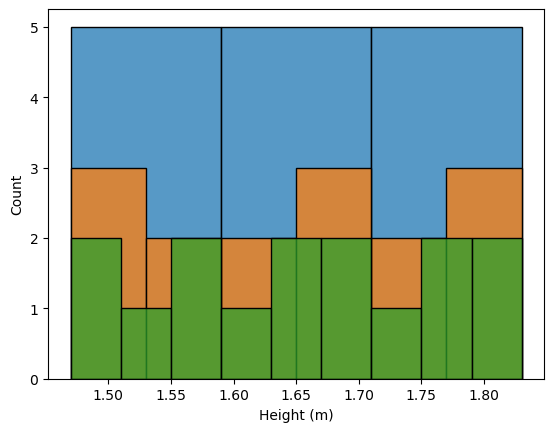

In [10]:
sns.histplot(people, x='Height (m)', bins=3)
sns.histplot(people, x='Height (m)', bins=6)
sns.histplot(people, x='Height (m)', bins=9)

#### What does the plot tell you about the data?

Regardless of the number of bins, the graph shows that there is a relatively equal distribution of people across the different heights.

### Item 6
#### Use a Seaborn jointplot to plot x=Height, y=Mass
#### Experiment with different bin #’s and find which one gives you the clearest information about the data.

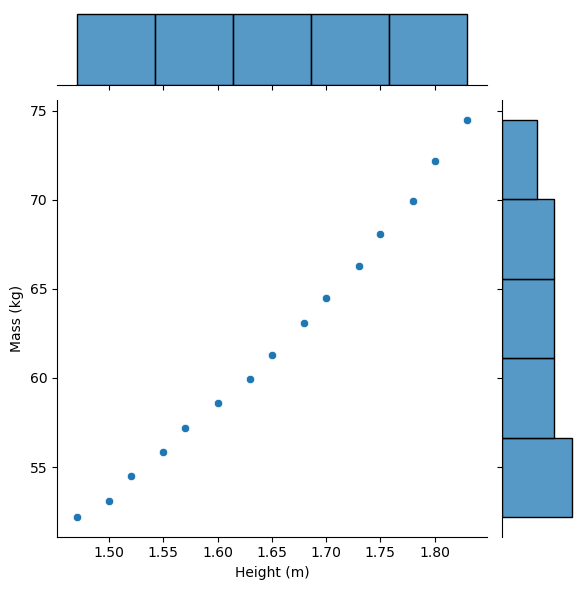

In [6]:
sns.jointplot(people, x='Height (m)', y='Mass (kg)')

#### Does this plot confirm what the histplot showed?

The joint plot confirms the insights about the sample distribution drawn from the histplots above. In addition, this joint plot shows a positive correlation between height and mass, which means that taller people tend to have more mass.

### Item 7
#### Split the data into training and testing data, using appropriate variable names.
#### Use sklearn train_test_split to split the data.

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(people.drop('Mass (kg)', axis = 1),
                                                people[['Mass (kg)']],
                                                test_size = 0.3)

In [17]:
display(x_train, x_test, y_train, y_test)

,Height (m)
5,1.60
9,1.70
6,1.63
3,1.55
1,1.50
7,1.65
8,1.68
14,1.83
13,1.80
12,1.78


,Height (m)
11,1.75
4,1.57
2,1.52
10,1.73
0,1.47


,Mass (kg)
5,58.57
9,64.47
6,59.93
3,55.84
1,53.12
7,61.29
8,63.11
14,74.46
13,72.19
12,69.92


,Mass (kg)
11,68.10
4,57.20
2,54.48
10,66.28
0,52.21


### Item 8
#### Create the model and fit it to the training data.
#### Create a sklearn LinearRegression model.
#### Use the fit method to fit it to the training data.

In [19]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### Item 9
#### Predict values based on testing data.
#### Use the predict method to predict values with the x testing data.

In [21]:
predictions = lm.predict(x_test)
predictions

array([[68.33079425],
       [56.69819213],
       [53.46691377],
       [67.0382829 ],
       [50.2356354 ]])

### Item 10
#### Print out error metrics:
#### - Mean Absolute Error (MAE)
#### - Mean Squared Error (MSE)
#### - Root Mean Squared Error (RMSE)

In [23]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.8956671709530937
MSE 1.1609058741511533
RMSE 1.0774534208731037


### Item 11
#### Predict some specific mass. Choose any height directly from the data, predict the weight for that height, and see whether the prediction is close to reality.
#### Explain how well the prediction matched reality, with specific attention to the RMSE error. Be specific and compare the numbers.

In [24]:
lm.predict([[1.73]])

array([[67.0382829]])

	Height (m)	Mass (kg)
	1.73	        66.28

 Predicted value: 67.04

 The linear regression model predicted a really good value for this height, with an error of only 0.76.
 
 This is a realistic prediction given that the RMSE is 0.93, which indicates that given a normal distribution of the observed values, 68% of the predictions is within 1 RMSE (+/-0.93) of the actual value; which is true since the predicted value of 67.04 is between 66.28-0.93 and 66.28+0.93.

### Item 12
#### Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True).
#### Explain how well the prediction matched reality, with specific attention to the RMSE error. Be specific and compare the numbers.

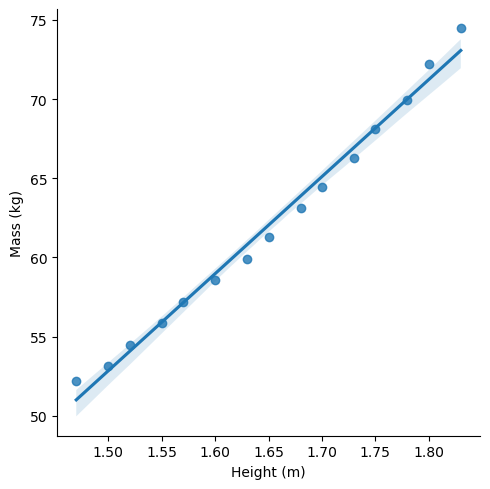

In [25]:
sns.lmplot(people, x='Height (m)', y='Mass (kg)')

#### Does this plot support your observations from task #6?

Yes. This confirms that there is a positive linear relationship between height and mass in the sample dataset.